# <center>Using Ordinary Differential Equations (ODEs) in Urban Planning</center>

<center>by Meng Cai</center>

---
An ordinary differential equation (ODE) is a differential equation containing one or more functions of one independent variable and the derivatives of those functions. The term ordinary is used in contrast with the term partial differential equation which may be with respect to more than one independent variable. (From Wikipedia: https://en.wikipedia.org/wiki/Ordinary_differential_equation)

The most common application of ODEs in urban planning is modeling urban population growth and the spread of contagious diseases. I found the examples from the CMSE801 ODE section (especially the one forecasting alien civilization) very similar to what has been done in my field, so I modified some of them to include here as example code.


# Urban population growth

Consider a 3-compartment model: urban population ($P$), jobs ($J$), and innovation ($I$). Let's assume that in City A, the  city's population $P$ has the initial value of 1 million. According to the US Bureau of Labor Statistics (2020), the current employment-to-population ratio is about 0.6. So we can assume City A initially has 0.6 million jobs $J$. The innovation $I$ leads to the creation of jobs at a certain rate, which we can manipulate.


The increase of jobs will lead to a growth in population as jobs attract people from outside of City A coming into the city. The increase of innovation adds a positive contribution to jobs. Thus, $J$ is converted to $P$ and $I$ is converted to $J$.

$I$ adds to $J$ in the following form:

$$
\frac{a}{q}\,\frac{I}{t+0.0001}
$$

(The little positive constant $0.0001$ in the denominator is added to avoid division by 0 at $t=0$, but effectively this term behaves as $\frac{I}{t}$.) And we can assume:

$$
q=\frac{a+b}{c}
$$

where $a$ is the rate of jobs attracting population and $b$ is the rate of innovation. $c$ is the combined amount of population and jobs.


While innovation contributes to the jobs, it does not decrease because of that. We can assume that innovation keeps increase at a constant rate $b$, as humans are innovative in nature. Similarly, while jobs contributes to the increase of population, the jobs themselves do not decrease because of that.

So we can represent this relationship as the following differential equations:

\begin{eqnarray}
\frac{dP}{dt} &=& q\,\frac{PJ}{1+I}\\
\frac{dJ}{dt} &=& \frac{a}{q}\,
                   \frac{I}{t+0.0001}\\
\frac{dI}{dt} &=& b
\end{eqnarray}

In these equations, $a$, $b$, $c$, and $q$ are constants, while $P$, $J$ and $I$ are functions of time $t$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [9]:
# model parameters
a = 0.02  # related to jobs attracting population
b = 0.05   # related to growth of innovation

# initial conditions
P0 = 1.0 # millions
J0 = 0.6 # millions
I0 = 0.0

# Define the constant c
c = P0+J0

# time period
Tmax = 100 # years

In [10]:
# the derivs function
def derivs(y, t, a, b, c):
    P, J, I = y
    q = (a+b)/c
    dpdt = q*P*J/(1+I)
    djdt = (a/q)*I/(t+0.0001)
    didt = b
    return dpdt, djdt, didt

In [17]:
time = np.arange(0, Tmax+0.1, 0.1)
y0 = [P0,J0,I0]

#solve ode
solution = odeint(derivs, y0, time, args = (a,b,c))
P=solution[:,0]
J=solution[:,1]
I=solution[:,2]

Text(0.5,1,'population vs time')

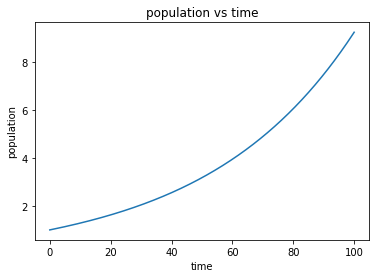

In [18]:
#plot
plt.plot(time, P)
plt.xlabel("time")
plt.ylabel("population")
plt.title("population vs time")

We can see that this model is over simplified. Without some constraining factors, urban populations are predicted to grow exponentially, which is not the case in reality.

---
# References

Bureau of Labor Statistics. (2020). Bureau of Labor Statistics Data. https://data.bls.gov/timeseries/LNS12300000